### Fisher-Tippett-Gnedenko in practice

The Fisher-Tippett-Gnedenko theorem states that the empirical maximum of an i.i.d sequence of random variable may only converge, after a suitable scaling and recentring, to one of three families of distribution (Gumbel, Frechet or Weibull). 

We exhibit below the convergence property for some standard distributions and measure the growth rate of the normalizing factors required to ensure convergence.

In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.stats import gumbel_r, norm, lognorm, pareto, cauchy, invweibull as frechet
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

### Parameters

In [3]:
N = 1000  # Sample size
M = 1000  # number of MC runs
nn = np.arange(1, N + 1)  # enumeration

def empirical_terminal_max(distr, N):
    return np.max(distr.rvs(size=N))

### Gaussian

In [4]:
# Gaussian
distr = norm

G = np.empty(M)
for m in tqdm(range(M)):
    empirical_max = empirical_terminal_max(distr, N)
    mu = distr.ppf(1 - 1 / N)
    sigma = distr.ppf(1 - np.exp(-1) / N) - mu
    G[m] = (empirical_max - mu) / sigma
    
mus = distr.ppf(1 - 1 / nn)
sigmas = distr.ppf(1 - np.exp(-1) / nn) - mus

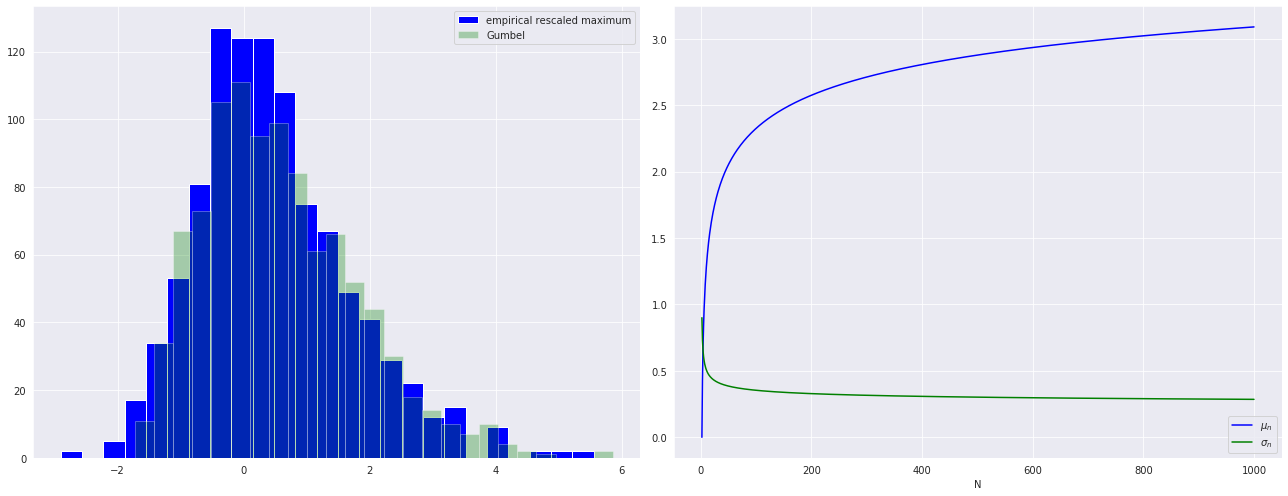

In [5]:
gumbel_sample = gumbel_r.rvs(size=M)

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.hist(G, bins=25, label='empirical rescaled maximum', color='blue')
    ax.hist(gumbel_sample, bins=25, alpha=0.3, label='Gumbel', color='green')
    ax.legend(loc='upper right')
    
    ax = axes[1]
    ax.plot(nn, mus, label='$\mu_n$', color='blue')
    ax.plot(nn, sigmas, label='$\sigma_n$', color='green')
    ax.legend(loc='lower right')
    ax.set_xlabel('N')
    plt.tight_layout()
    plt.show()

### Lognormal

In [6]:
distr = lognorm(1.0)

G = np.empty(M)
for m in tqdm(range(M)):
    empirical_max = empirical_terminal_max(distr, N)
    mu = distr.ppf(1 - 1 / N)
    sigma = mu / np.sqrt(2 * np.log(N))
    G[m] = (empirical_max - mu) / sigma
    
mus = distr.ppf(1 - 1 / nn)
sigmas = distr.ppf(1 - np.exp(-1) / nn) - mus

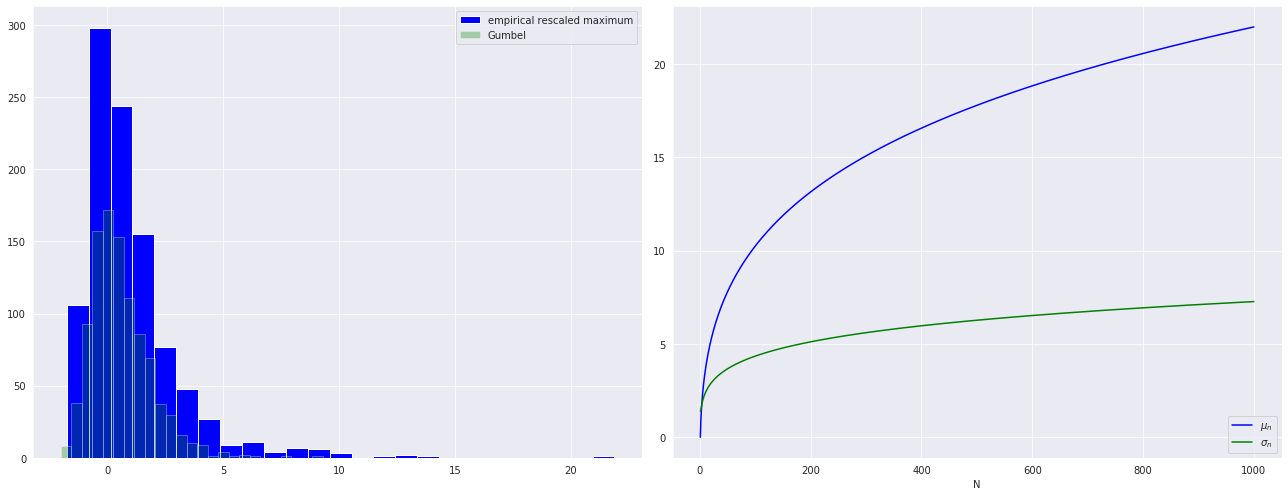

In [7]:
gumbel_sample = gumbel_r.rvs(size=M)

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.hist(G, bins=25, label='empirical rescaled maximum', color='blue')
    ax.hist(gumbel_sample, bins=25, alpha=0.3, label='Gumbel', color='green')
    ax.legend(loc='upper right')
    
    ax = axes[1]
    ax.plot(nn, mus, label='$\mu_n$', color='blue')
    ax.plot(nn, sigmas, label='$\sigma_n$', color='green')
    ax.legend(loc='lower right')
    ax.set_xlabel('N')
    plt.tight_layout()
    plt.show()

### Pareto

In [8]:
b = 5.0
distr = pareto(b=b)

G = np.empty(M)
for m in tqdm(range(M)):
    empirical_max = empirical_terminal_max(distr, N)
    sigma = distr.ppf(1 - 1 / N)
    G[m] = empirical_max / sigma
    
sigmas = distr.ppf(1 - 1 / nn)

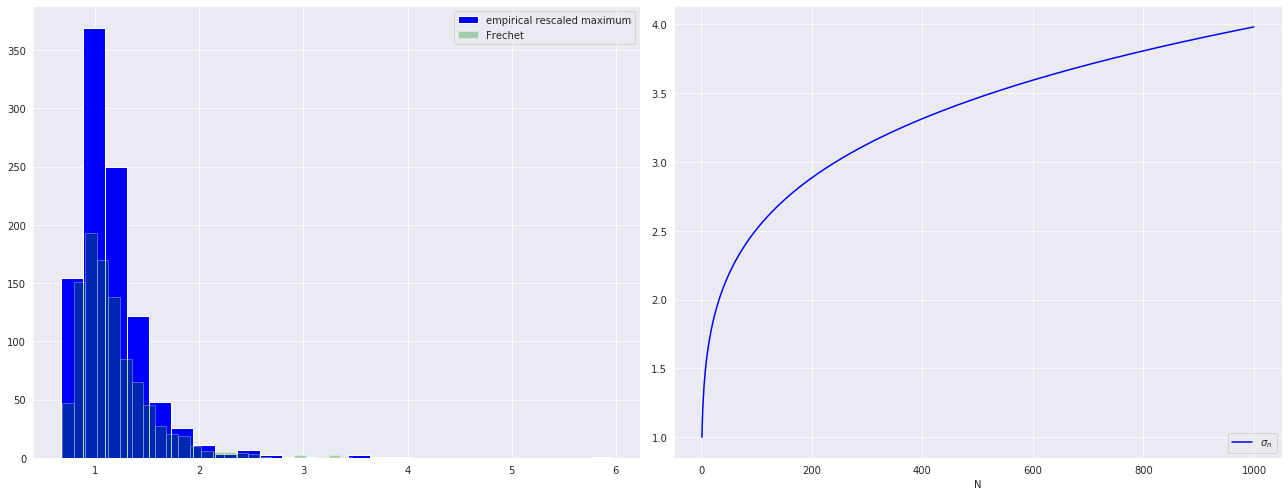

In [9]:
frechet_sample = frechet(c=b).rvs(size=M)

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.hist(G, bins=25, label='empirical rescaled maximum', color='blue')
    ax.hist(frechet_sample, bins=25, alpha=0.3, label='Frechet', color='green')
    ax.legend(loc='upper right')
    
    ax = axes[1]
    ax.plot(nn, sigmas, label='$\sigma_n$', color='blue')
    ax.legend(loc='lower right')
    ax.set_xlabel('N')
    plt.tight_layout()
    plt.show()

### Cauchy

In [10]:
distr = cauchy

G = np.empty(M)
for m in tqdm(range(M)):
    empirical_max = empirical_terminal_max(distr, N)
    sigma = distr.ppf(1 - 1 / N)
    G[m] = empirical_max / sigma
    
sigmas = distr.ppf(1 - 1 / nn)

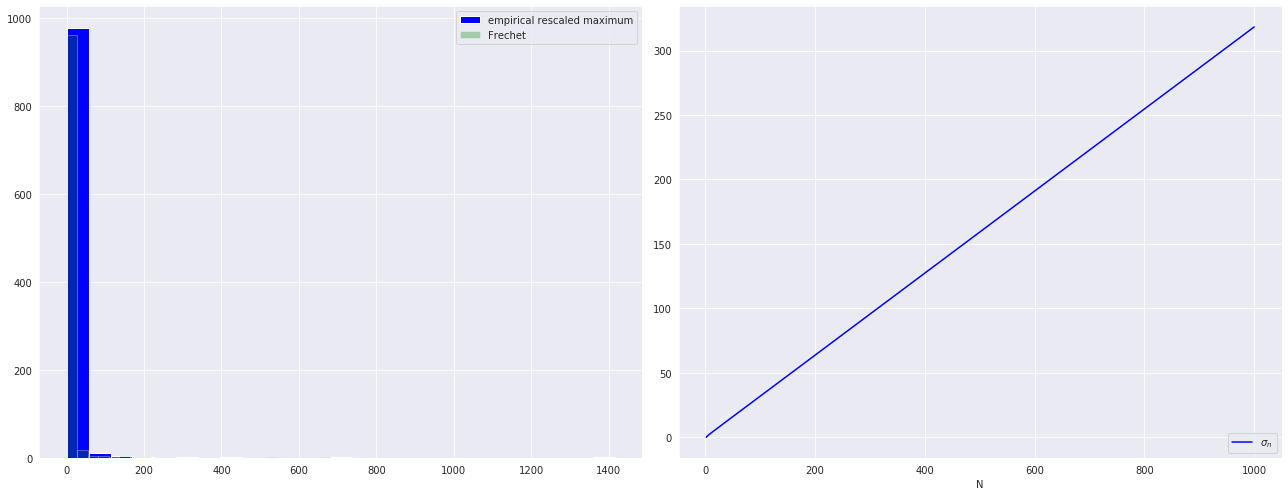

In [11]:
frechet_sample = frechet(c=1.0).rvs(size=M)

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)
    
    ax = axes[0]
    ax.hist(G, bins=25, label='empirical rescaled maximum', color='blue')
    ax.hist(frechet_sample, bins=25, alpha=0.3, label='Frechet', color='green')
    ax.legend(loc='upper right')
    
    ax = axes[1]
    ax.plot(nn, sigmas, label='$\sigma_n$', color='blue')
    ax.legend(loc='lower right')
    ax.set_xlabel('N')
    plt.tight_layout()
    plt.show()